## author: Levon Abramian, J4132
## Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms

### Goal: The use of stochastic and metaheuristic algorithms (Simulated Annealing, Differential Evolution, Particle Swarm Optimization) in the tasks of unconstrained nonlinear optimization and the experimental comparison of them with Nelder-Mead and Levenberg-Marquardt algorithms

In [104]:
import matplotlib.pyplot as plt
import numpy as np

from pyswarm import pso
from scipy.optimize import minimize, least_squares, differential_evolution, dual_annealing

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
EPS = 0.001
N_ELEMS = 1001
MAX_NITER = 1000

In [88]:
def func(x):
    return 1./(x**2 - 3*x + 2)

In [89]:
def get_y(x, delta):
    f = func(x)
    f = np.where(f < -100, -100 + delta, f)
    f = np.where((100 > f) & (f > -100), f + delta, f)
    f = np.where(f > 100,  100 + delta, f)
    return f

In [90]:
def rational_approximation(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

In [91]:
def loss(params, x, y):
    a, b, c, d = params
    predictions = rational_approximation(x, a, b, c, d)
    return np.sum((predictions - y) ** 2)

In [92]:
def neldermead_method(x, y, initial_params):
    result = minimize(loss, initial_params, args=(x, y), method='Nelder-Mead', tol=0.001, options={"maxiter": MAX_NITER, 'return_all':True})
    return result

def levenberg_marquardt(x, y, initial_params):
    def residuals(params):
        return rational_approximation(x, *params) - y
    
    result = least_squares(residuals, initial_params, method='lm', verbose=1)
    
    return result

In [106]:
def annual_method(x, y, initial_params):
    bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
    result = dual_annealing(loss, bounds, args=(x, y), maxiter=MAX_NITER)
    return result

def differential_evolution_method(x, y, initial_params):
    bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
    result = differential_evolution(loss, bounds, args=(x, y), maxiter=MAX_NITER)
    return result

def swarm_method(x, y, initial_params):
    pso_bounds = [(-10, 10)] * 4  # Four parameters to optimize
    pso_result, pso_best_cost = pso(loss_function, lb=(-10, -10, -10, -10), ub=(10, 10, 10, 10), args=(x, y), maxiter=MAX_NITER)
    # bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
    # result = differential_evolution(loss, bounds, args=(x, y), maxiter=MAX_NITER)
    return pso_result, pso_best_cost

In [95]:
x_list = np.linspace(0, 3, N_ELEMS)
delta = np.random.normal(size=N_ELEMS)
y_list = get_y(x_list, delta)

Just checking the data with noise using a graph

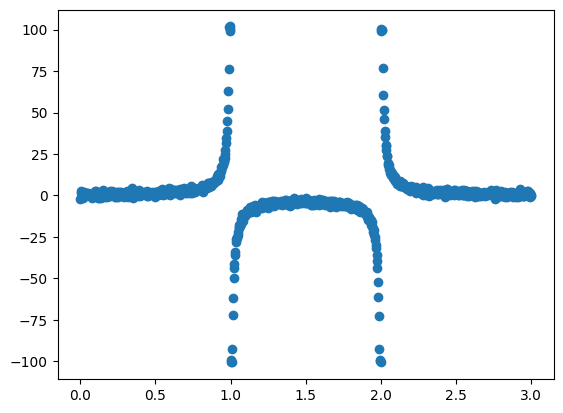

In [96]:
plt.scatter(x_list, y_list)

In [107]:
initial_params = [0.1, 0.1, 0.1, 0.1]
neldermead_params = neldermead_method(x_list, y_list, initial_params)
lm_params = levenberg_marquardt(x_list, y_list, initial_params)
de_params = differential_evolution_method(x_list, y_list, initial_params)
annual_params = annual_method(x_list, y_list, initial_params)
swarm_params = swarm_method(x_list, y_list, initial_params)

`xtol` termination condition is satisfied.
Function evaluations 181, initial cost 1.3492e+05, final cost 6.8466e+04, first-order optimality 1.05e+08.
Stopping search: Swarm best position change less than 1e-08


In [108]:
swarm_params

(array([-3.59692079,  3.60109036, -2.00447701,  1.00767338]),
 np.float64(257760.0118395421))

Text(0.5, 1.0, 'Approximation Nelder-Mead')

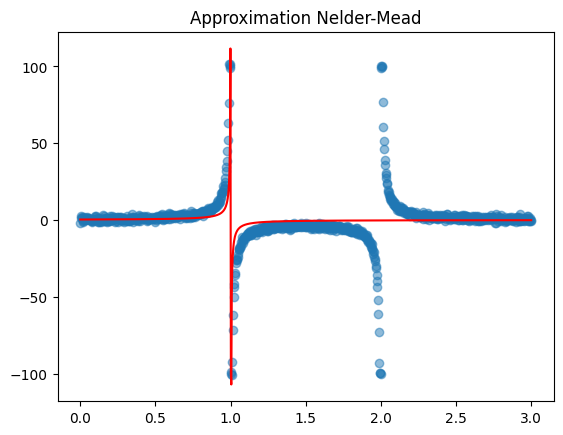

In [98]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *neldermead_params.x), color='red', label='Gradient Descent Fit')
plt.title('Approximation Nelder-Mead')

Text(0.5, 1.0, 'Approximation Levenberg-Marquardt')

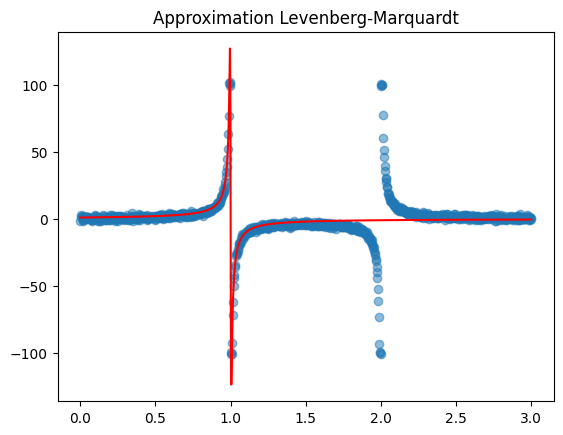

In [99]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *lm_params.x), color='red', label='Levenberg Marquardt')
plt.title('Approximation Levenberg-Marquardt')

Text(0.5, 1.0, 'Approximation Differential Evolution')

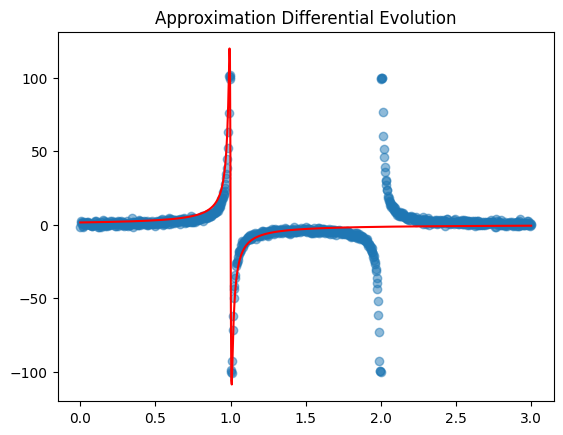

In [100]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *de_params.x), color='red', label='Differential Evolution')
plt.title('Approximation Differential Evolution')

Text(0.5, 1.0, 'Approximation Annual Method')

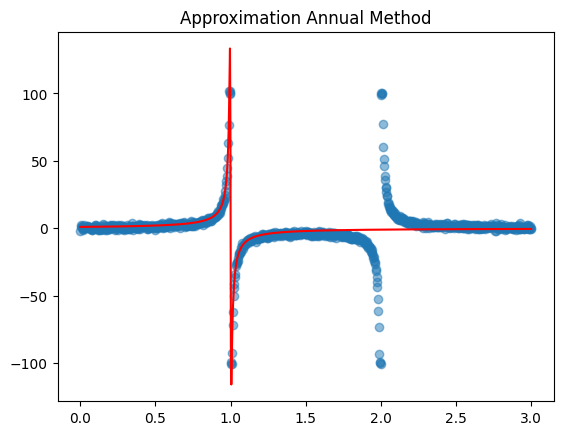

In [101]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *annual_params.x), color='red', label='Annual Method')
plt.title('Approximation Annual Method')

Text(0.5, 1.0, 'Approximation Annual Method')

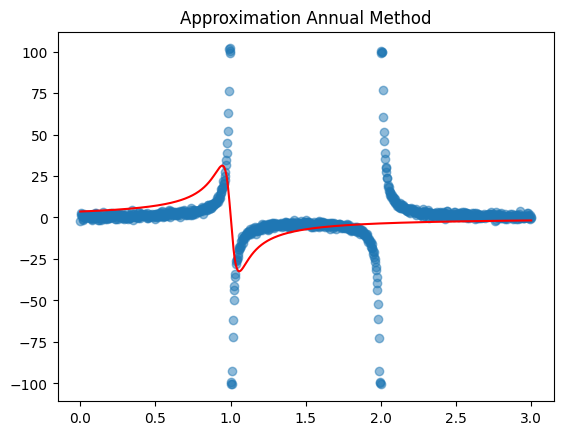

In [110]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *swarm_params[0]), color='red', label='Annual Method')
plt.title('Approximation Annual Method')

## PART 2

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define cities and their coordinates
cities = {
    'New York': (40.7128, -74.0060),
    'Los Angeles': (34.0522, -118.2437),
    'Chicago': (41.8781, -87.6298),
    'Houston': (29.7604, -95.3698),
    'Phoenix': (33.4484, -112.0740),
    'Philadelphia': (39.9526, -75.1652),
    'San Antonio': (29.4241, -98.4936),
    'San Diego': (32.7157, -117.1611),
    'Dallas': (32.7767, -96.7970),
    'San Jose': (37.3382, -121.8863),
    'Austin': (30.2672, -97.7431),
    'Jacksonville': (30.3322, -81.6557),
    'Montreal': (45.5069, -73.5740),
    'Columbus': (39.9612, -82.9988),
    'San Francisco': (37.7749, -122.4194),
}


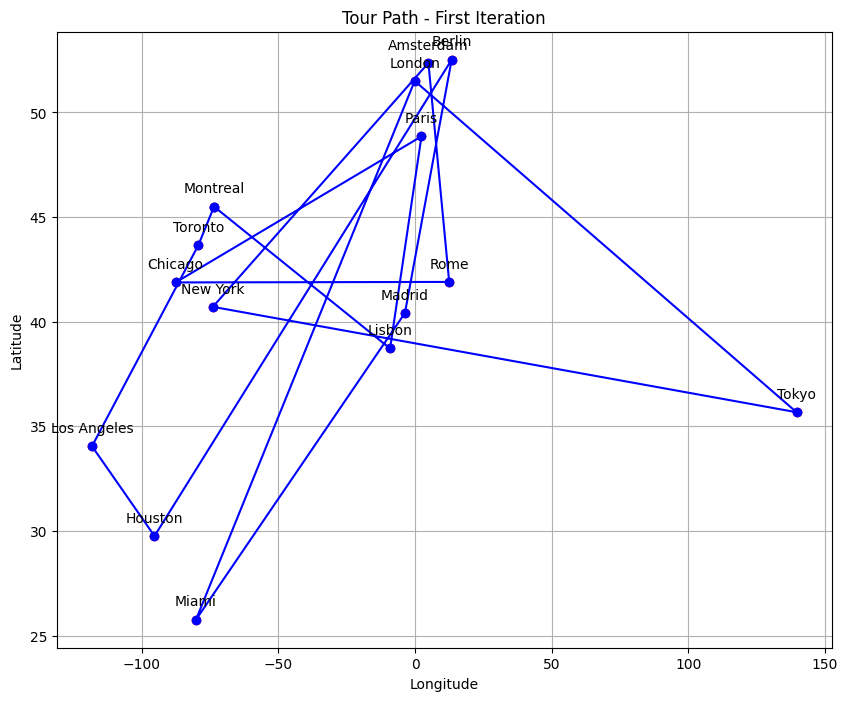

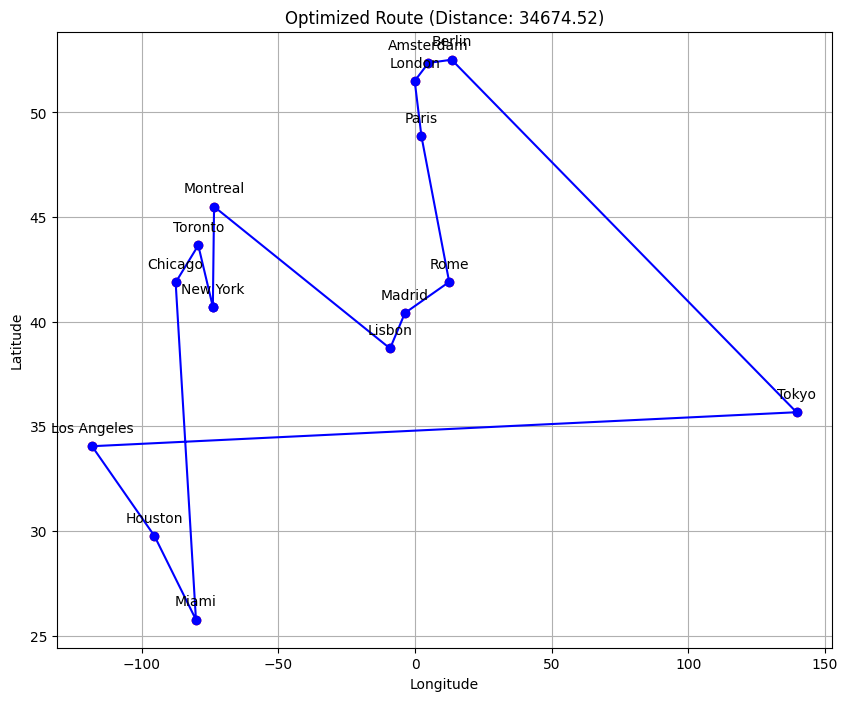

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 1: Define cities and their coordinates (latitude, longitude)
cities = {
    'New York': (40.7128, -74.0060),
    'Chicago': (41.8781, -87.6298),
    'Los Angeles': (34.0522, -118.2437),
    'Houston': (29.7604, -95.3698),
    'Miami': (25.7617, -80.1918),
    'Toronto': (43.6510, -79.347015),
    'Montreal': (45.5017, -73.5673),
    'London': (51.5074, -0.1278),
    'Paris': (48.8566, 2.3522),
    'Berlin': (52.5200, 13.4050),
    'Amsterdam': (52.3676, 4.9041),
    'Madrid': (40.4168, -3.7038),
    'Rome': (41.9028, 12.4964),
    'Lisbon': (38.7223, -9.1393),
    'Tokyo': (35.6762, 139.6503),
}

# Step 2: Calculate the distance matrix using Haversine formula
def haversine(coord1, coord2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = (np.sin(dlat / 2) ** 2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

def calculate_distance_matrix(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    city_names = list(cities.keys())

    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                distance_matrix[i][j] = haversine(cities[city_names[i]], cities[city_names[j]])

    return distance_matrix

distance_matrix = calculate_distance_matrix(cities)

# Step 3: Simulated Annealing Algorithm
def simulated_annealing(distance_matrix, initial_temp=10000, cooling_rate=0.995, stopping_temp=1):
    num_cities = len(distance_matrix)
    current_solution = list(range(num_cities))
    random.shuffle(current_solution)

    current_distance = total_distance(current_solution, distance_matrix)
    best_solution = current_solution[:]
    best_distance = current_distance

    iteration_results = []  # Store iteration results

    temperature = initial_temp
    while temperature > stopping_temp:
        new_solution = current_solution[:]
        i, j = random.sample(range(num_cities), 2)  # Swap two cities
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

        new_distance = total_distance(new_solution, distance_matrix)

        if new_distance < current_distance or random.uniform(0, 1) < np.exp((current_distance - new_distance) / temperature):
            current_solution = new_solution

            current_distance = new_distance

            if new_distance < best_distance:
                best_solution = new_solution[:]
                best_distance = new_distance

        iteration_results.append(current_solution[:])  # Track current solution

        temperature *= cooling_rate

    return best_solution, best_distance, iteration_results

def total_distance(order, distance_matrix):
    return sum(distance_matrix[order[i], order[(i + 1) % len(order)]] for i in range(len(order)))

# Step 4: Run the simulated annealing algorithm
best_solution, best_distance, iteration_results = simulated_annealing(distance_matrix)

# Step 5: Visualization of the optimized route
def plot_cities(cities, solution, title):
    coordinates = np.array(list(cities.values()))
    path = np.concatenate([coordinates[solution], [coordinates[solution[0]]]])  # Loop back to start

    plt.figure(figsize=(10, 8))
    plt.plot(path[:, 1], path[:, 0], marker='o', color='blue', linestyle='-')
    plt.scatter(coordinates[:, 1], coordinates[:, 0], color='red')

    for i, city in enumerate(cities.keys()):
        plt.annotate(city, (coordinates[i][1], coordinates[i][0]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

# Plot the first iteration
plot_cities(cities, iteration_results[0], 'Tour Path - First Iteration')

# Plot the optimized route
plot_cities(cities, best_solution, f'Optimized Route (Distance: {best_distance:.2f})')
